# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [3]:
Path.cwd().parents[1]

WindowsPath('c:/Users/ENVY/Documents/GitHub/AIMS-DSCBI')

In [5]:
# Uncomment the following lines and add your code to define the directories and files

DIR_DATA = Path.cwd().parents[1].joinpath("data")

FILE_HEALTH_DATA = DIR_DATA/"RW-Health-Data.xlsx"
FILE_POP_DATA = DIR_DATA/"rwa-cell-pop.csv"
FILE_NTL_DATA = DIR_DATA/"cell-ntl-2015-2020-2024.csv"


# Ensure directories exist
if not DIR_DATA.exists():
    raise FileNotFoundError(f"Data directory {DIR_DATA} does not exist. Please ensure the data folder is set up correctly.")


# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

# TASK 1

In [6]:
# Read the Excel file
df_health= pd.ExcelFile(FILE_HEALTH_DATA)

# Get sheet names
sheet_names = df_health.sheet_names
print("Sheets in Excel file:", sheet_names)


Sheets in Excel file: ['dhs-mobile_subnational_rwa', 'access-to-health-care_subnation', 'child-mortality-rates_subnation', 'covid-19-prevention_subnational', 'dhs-quickstats_subnational_rwa', 'fertility-rates_subnational_rwa', 'health-insurance_subnational_rw', 'immunization_subnational_rwa', 'mens-fertility-and-family-plann', 'symptoms-of-acute-respiratory-i']


In [7]:
for sheet in sheet_names:
    df = pd.read_excel(FILE_HEALTH_DATA, sheet_name=sheet)
    
    print(f"\nColumns in sheet {sheet}:", df.columns)


Columns in sheet dhs-mobile_subnational_rwa: Index(['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision',
       'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId',
       'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId',
       'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel',
       'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID',
       'RegionId', 'SurveyYearLabel', 'SurveyType', 'DenominatorWeighted',
       'DenominatorUnweighted', 'CILow', 'CIHigh', 'LevelRank'],
      dtype='object')

Columns in sheet access-to-health-care_subnation: Index(['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision',
       'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId',
       'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId',
       'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel',
       'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID

In [ ]:
national_summaries = []

# Process each sheet
for sheet in sheet_names:
    # Read the sheet, skipping the first row (metadata)
    df = pd.read_excel(FILE_HEALTH_DATA, sheet_name=sheet, skiprows=[1])
    
    df.columns = df.columns.str.lower().str.strip()
    df['surveyyear'] = df['surveyyear'].astype(str)

    # Verify needed columns exist
    needed_cols = ['value', 'surveyyear', 'surveytype']
    missing_cols = [col for col in needed_cols if col not in df.columns]
    if missing_cols:
        print(f"Missing columns {missing_cols} in sheet {sheet}. Skipping.")
        continue
        
    # Group by surveyyear to compute mean for each year
    grouped = df.groupby('surveyyear').agg({
            'value': 'mean',  
            'surveytype': 'first' 
        }).reset_index()
    
# Add summaries for each year in the sheet
    for _, row in grouped.iterrows():
            national_summaries.append({
                'indicator_name': sheet,
                'aggregated_value': row['value'],
                'indicator_year': row['surveyyear'] if pd.notna(row['surveyyear']) else 'Unknown',
                'survey_name': row['surveytype'] if pd.notna(row['surveytype']) else sheet,
                'aggregation_method': 'mean'
            })

# Convert to DataFrame
national_df = pd.DataFrame(national_summaries)

# Display in Jupyter Notebook
print("\nNational-Level Summaries:")
print(national_df)

# Save to CSV
national_df.to_csv(DIR_DATA / "national_health_indicators.csv", index=False)
print("National summaries saved to 'national_health_indicators.csv'")


National-Level Summaries:
                     indicator_name  aggregated_value indicator_year  \
0        dhs-mobile_subnational_rwa         38.079800           1992   
1        dhs-mobile_subnational_rwa         35.107802           2000   
2        dhs-mobile_subnational_rwa         34.465509           2005   
3        dhs-mobile_subnational_rwa         45.056675           2008   
4        dhs-mobile_subnational_rwa         42.126941           2010   
..                              ...               ...            ...   
69  symptoms-of-acute-respiratory-i        518.428333           2005   
70  symptoms-of-acute-respiratory-i        284.960000           2008   
71  symptoms-of-acute-respiratory-i        452.570312           2010   
72  symptoms-of-acute-respiratory-i        391.584286           2015   
73  symptoms-of-acute-respiratory-i        534.648980           2019   

   survey_name aggregation_method  
0          DHS               mean  
1          DHS               mean  


# TASK 2

In [ ]:
# Read the Excel file
excel_file = pd.ExcelFile(FILE_HEALTH_DATA)

# Get sheet names
sheet_names = excel_file.sheet_names

# Initialize an empty DataFrame for merged subnational data
subnational_df = pd.DataFrame()

# Process each sheet
for sheet in sheet_names:
    df = pd.read_excel(FILE_HEALTH_DATA, sheet_name=sheet, skiprows=[1])
    
    df.columns = df.columns.str.lower().str.strip()
    
    # Define required columns
    required_cols = ['location', 'value', 'surveyyear', 'surveytype']
    
    # Check for missing columns
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Missing columns {missing_cols} in sheet '{sheet}'. Skipping.")
        continue
    
    # Check for valid data in 'value' column
    if df['value'].isna().all():
        print(f"No valid data in 'value' column for sheet '{sheet}'. Skipping.")
        continue
    
    # Standardize location values
    df['location'] = df['location'].astype(str).str.strip().str.lower()
    
    # Check for duplicates in location and surveyyear
    duplicates = df.duplicated(subset=['location', 'surveyyear']).sum()
    if duplicates > 0:
        print(f"Warning: {duplicates} duplicate location-surveyyear pairs in sheet '{sheet}'. Dropping duplicates.")
        df = df.drop_duplicates(subset=['location', 'surveyyear'])
    
    # Group by location and surveyyear to compute aggregates
    agg_method = 'mean' 
    temp_df = df.groupby(['location', 'surveyyear']).agg({
        'value': 'mean',
        'surveytype': 'first'
    }).reset_index()
    
    # Add aggregation method column
    temp_df['aggregation_method'] = agg_method
    
    # Merge with subnational_df on location and surveyyear
    if subnational_df.empty:
        subnational_df = temp_df
    else:
        subnational_df = subnational_df.merge(temp_df, on=['location', 'surveyyear'], how='outer', suffixes=('', f'_{sheet}'))
    
# Rename columns to include sheet name for clarity, preserving location and surveyyear
for sheet in sheet_names:
    if f'value_{sheet}' in subnational_df.columns:
        subnational_df = subnational_df.rename(columns={
            f'value_{sheet}': f"{sheet}_value",
            f'surveytype_{sheet}': f"{sheet}_survey",
            'aggregation_method': f"{sheet}_aggregation_method" if sheet == sheet_names[0] else f"{sheet}_aggregation_method"
        })

# Display the merged DataFrame
print("\nSubnational-Level Merged Dataset:")
if subnational_df.empty:
    print("Warning: The DataFrame is empty. Check the column names, location values, and data in the Excel sheets.")
else:
    print(subnational_df.head())

# Save to CSV
subnational_df.to_csv(DIR_DATA / "subnational_health_indicators.csv", index=False)
print("Subnational dataset saved to 'subnational_health_indicators.csv'")


Subnational-Level Merged Dataset:
          location  surveyyear  value surveytype  \
0           butare        1992    4.8        DHS   
1           butare        2000    4.9        DHS   
2  butare/gitarama        1992    5.2        DHS   
3  butare/gitarama        2000    4.9        DHS   
4           byumba        1992    6.2        DHS   

  access-to-health-care_subnation_aggregation_method  \
0                                               mean   
1                                               mean   
2                                               mean   
3                                               mean   
4                                               mean   

   access-to-health-care_subnation_value  \
0                                    2.9   
1                                   19.5   
2                                    1.5   
3                                   16.0   
4                                    0.9   

  access-to-health-care_subnation_survey  \
0     

## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions

# PART A

## Population Dataset

In [6]:
# Load the population dataset
pop_df = pd.read_csv(FILE_POP_DATA)

# Create variables
pop_df['working_age_population'] = pop_df['general_2020'] - (pop_df['children_under_five_2020'] + pop_df['elderly_60_plus_2020'])

pop_df['dependency_ratio'] = ((pop_df['children_under_five_2020'] +  pop_df['elderly_60_plus_2020']) / pop_df['working_age_population']) * 100

pop_df['people_per_building'] = pop_df['general_2020'] / pop_df['building_count'].replace(0, pd.NA)

# Create infrastructure_index
# First normalize variables to have everything in the same range
# Explanation: Higher people_per_building indicates infrastructure pressure; higher building_count indicates more infrastructure
# This means that if the infrastructure index is positive, there is pressure, otherwise, more infrastructure available

pop_df['people_per_building_norm'] = (pop_df['people_per_building'] - pop_df['people_per_building'].mean()) / pop_df['people_per_building'].std()

pop_df['building_count_norm'] = (pop_df['building_count'] - pop_df['building_count'].mean()) / pop_df['building_count'].std()
                                
pop_df['infrastructure_index'] = pop_df['people_per_building_norm'] - pop_df['building_count_norm']

# Drop unnecessary columns
pop_df=pop_df.drop(['people_per_building_norm','building_count_norm'], axis=1)


# Save updated version of the population dataset
pop_df.to_csv(DIR_DATA / "rwa-cell-pop_updated.csv", index=False)

## Nightlight Dataset

In [7]:
# Load nightlight dataset
ntl_df = pd.read_csv(FILE_NTL_DATA)

# Pivot the data to have years as columns for easier comparison
ntl_pivot = ntl_df.pivot_table(index=['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name'],
                              columns='year',
                              values=['total_nightlight', 'mean_nightlight', 'lit_pixel_count', 'pixel_count'],
                              aggfunc='first').reset_index()
ntl_pivot

# # Flatten column names
ntl_pivot.columns = [f"{col[0]}_{col[1]}" if isinstance(col, tuple) and col[1] else col[0] for col in ntl_pivot.columns]
ntl_pivot.columns
# Calculate percentage changes
ntl_pivot['nightlight_change_2015_2024'] = ((ntl_pivot['total_nightlight_2024'] - ntl_pivot['total_nightlight_2015']) /  ntl_pivot['total_nightlight_2015']) * 100
ntl_pivot['mean_nightlight_change_2015_2024'] = ((ntl_pivot['mean_nightlight_2024'] - ntl_pivot['mean_nightlight_2015']) / ntl_pivot['mean_nightlight_2015']) * 100
ntl_pivot['lit_pixel_percentage_2015'] = (ntl_pivot['lit_pixel_count_2015'] / ntl_pivot['pixel_count_2015']) * 100
ntl_pivot['lit_pixel_percentage_2020'] = (ntl_pivot['lit_pixel_count_2020'] / ntl_pivot['pixel_count_2020']) * 100
ntl_pivot['lit_pixel_percentage_2024'] = (ntl_pivot['lit_pixel_count_2024'] / ntl_pivot['pixel_count_2024']) * 100


# Save updated nightlight dataset
ntl_pivot.to_csv(DIR_DATA / "cell-ntl-2015-2020-2024_updated.csv", index=False)

## Data Integration

In [8]:
# Merge datasets on cell_id
merged_df = pop_df.merge(ntl_pivot, on='cell_id', how='inner')

# Display the merged DataFrame
merged_df.head()

# Save merged dataset
merged_df.to_csv(DIR_DATA / "merged_pop_ntl.csv", index=False)

# PART B

## Correlation analysis

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cell_id                           2169 non-null   object 
 1   province_name_x                   2169 non-null   object 
 2   district_name_x                   2169 non-null   object 
 3   sector_name_x                     2169 non-null   object 
 4   cell_name_x                       2169 non-null   object 
 5   elderly_60_plus_2020              2169 non-null   float64
 6   general_2020                      2169 non-null   float64
 7   children_under_five_2020          2169 non-null   float64
 8   youth_15_24_2020                  2169 non-null   float64
 9   men_2020                          2169 non-null   float64
 10  women_2020                        2169 non-null   float64
 11  building_count                    2169 non-null   float64
 12  workin

In [11]:
# convert to numeric all columns with numbers as values
merged_df = merged_df.apply(pd.to_numeric, errors='ignore')

C:\Users\ENVY\AppData\Local\Temp\ipykernel_21148\2069090261.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  merged_df = merged_df.apply(pd.to_numeric, errors='ignore')


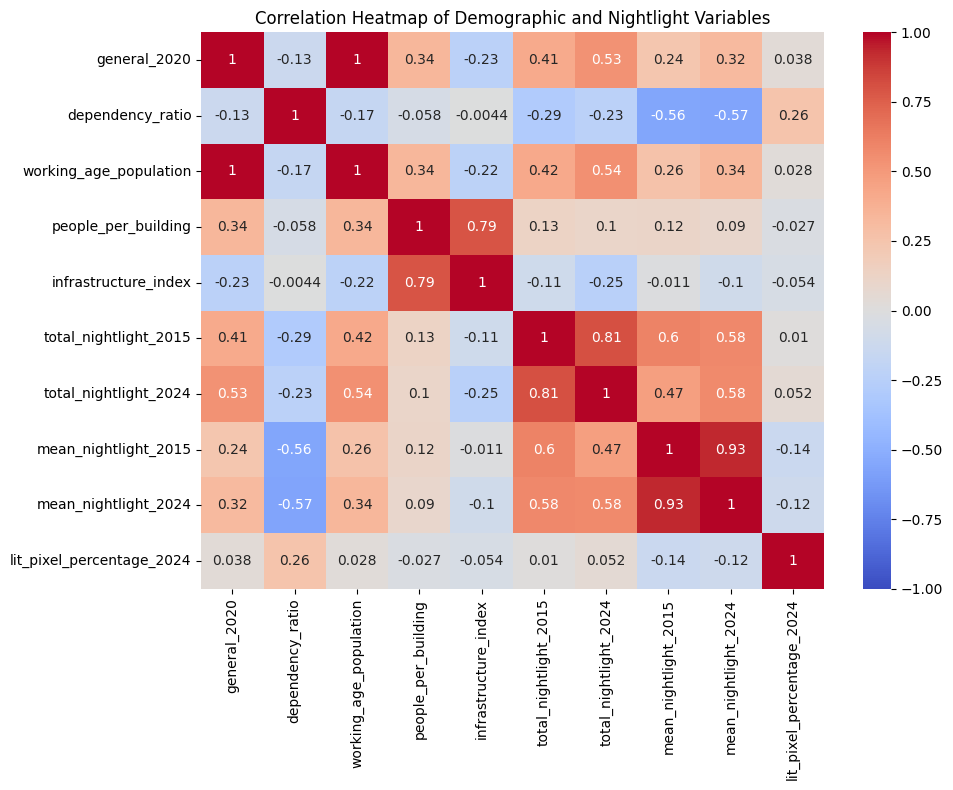


Top 3 correlated variable pairs (sorted by absolute correlation, showing actual correlation):
                                              Correlation
general_2020          working_age_population     0.998883
mean_nightlight_2015  mean_nightlight_2024       0.931522
total_nightlight_2015 total_nightlight_2024      0.809456


In [ ]:
# Select 10 variables
key_vars = ['general_2020', 'dependency_ratio', 'working_age_population','people_per_building', 'infrastructure_index',
            'total_nightlight_2015', 'total_nightlight_2024', 'mean_nightlight_2015', 
            'mean_nightlight_2024', 'lit_pixel_percentage_2024']

# Compute correlation matrix
corr_matrix = merged_df[key_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Demographic and Nightlight Variables")
plt.tight_layout()
plt.show()

# Get top 3 correlated pairs
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# # Get correlation pairs, excluding self-correlations
# corr_pairs = corr_matrix.where(~np.eye(len(corr_matrix), dtype=bool)).stack().sort_values(ascending=False)
# top_3_pairs = corr_pairs.head(3)

# Get correlation pairs, excluding self-correlations and duplicates
# Use upper triangle to avoid duplicate pairs
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
# Create a DataFrame to store both absolute and actual correlation values
corr_pairs_df = pd.DataFrame({
    'Correlation': corr_pairs,
    'Absolute_Correlation': corr_pairs.abs()
})

# Sort by absolute correlation in descending order
corr_pairs_df = corr_pairs_df.sort_values(by='Absolute_Correlation', ascending=False)
top_3_pairs = corr_pairs_df.head(3)
print("\nTop 3 correlated variable pairs (sorted by absolute correlation, showing actual correlation):")
print(top_3_pairs[['Correlation']])


Unexpected Correlation is for dependency_ratio and mean_nightlight_2024 which might suggest that areas with high dependency ratios have less development

## Nightlight Trend Analysis:

In [ ]:
# Rank districts by nightlight growth
district_growth = merged_df.groupby('district_name_x').agg({
    'nightlight_change_2015_2024': 'mean'
}).reset_index().sort_values('nightlight_change_2015_2024', ascending=False)

# Top 5 and bottom 5 districts
top_5_districts = district_growth.head(5)
bottom_5_districts = district_growth.tail(5)
print("Top 5 Districts by Nightlight Growth:")
print(top_5_districts)
print("\nBottom 5 Districts by Nightlight Growth:")
print(bottom_5_districts)


Top 5 Districts by Nightlight Growth:
   district_name_x  nightlight_change_2015_2024
23       Nyaruguru                   877.416033
18       Nyagatare                   757.478221
0         Bugesera                   716.347835
12          Kirehe                   639.036715
15           Ngoma                   623.507823

Bottom 5 Districts by Nightlight Growth:
   district_name_x  nightlight_change_2015_2024
21          Nyanza                   399.027914
13         Muhanga                   390.763713
11        Kicukiro                   387.778971
24          Rubavu                   318.383571
22      Nyarugenge                   192.749160


In [36]:
# Lit pixel analysis for these districts
lit_pixel_analysis = merged_df.groupby('district_name_x').agg({
    'lit_pixel_percentage_2015': 'mean',
    'lit_pixel_percentage_2024': 'mean'
}).reset_index()
lit_pixel_analysis['lit_pixel_change'] = (lit_pixel_analysis['lit_pixel_percentage_2024'] - lit_pixel_analysis['lit_pixel_percentage_2015'])
lit_pixel_analysis = lit_pixel_analysis[lit_pixel_analysis['district_name_x'].isin(
    top_5_districts['district_name_x'].tolist() + bottom_5_districts['district_name_x'].tolist())]
print("\nLit Pixel Percentage Changes for Top/Bottom Districts:")
print(lit_pixel_analysis)
lit_pixel_analysis.to_csv(DIR_DATA/"lit_pixel_analysis.csv", index=False)


Lit Pixel Percentage Changes for Top/Bottom Districts:
   district_name_x  lit_pixel_percentage_2015  lit_pixel_percentage_2024  \
0         Bugesera                  43.883068                  43.883068   
11        Kicukiro                  34.229752                  34.229752   
12          Kirehe                  43.870903                  43.891130   
13         Muhanga                  43.724362                  43.724362   
15           Ngoma                  42.619420                  42.648797   
18       Nyagatare                  42.929825                  43.017698   
21          Nyanza                  44.464682                  44.464682   
22      Nyarugenge                  28.873768                  28.873768   
23       Nyaruguru                  44.512646                  45.046064   
24          Rubavu                  38.488167                  38.488167   

    lit_pixel_change  
0           0.000000  
11          0.000000  
12          0.020227  
13          0.0

Nightlight columns: ['total_nightlight_2015', 'total_nightlight_2020', 'total_nightlight_2024']
Years: [2015, 2020, 2024]
Districts to plot: ['Nyaruguru', 'Nyagatare', 'Bugesera', 'Kirehe', 'Ngoma', 'Nyanza', 'Muhanga', 'Kicukiro', 'Rubavu', 'Nyarugenge']


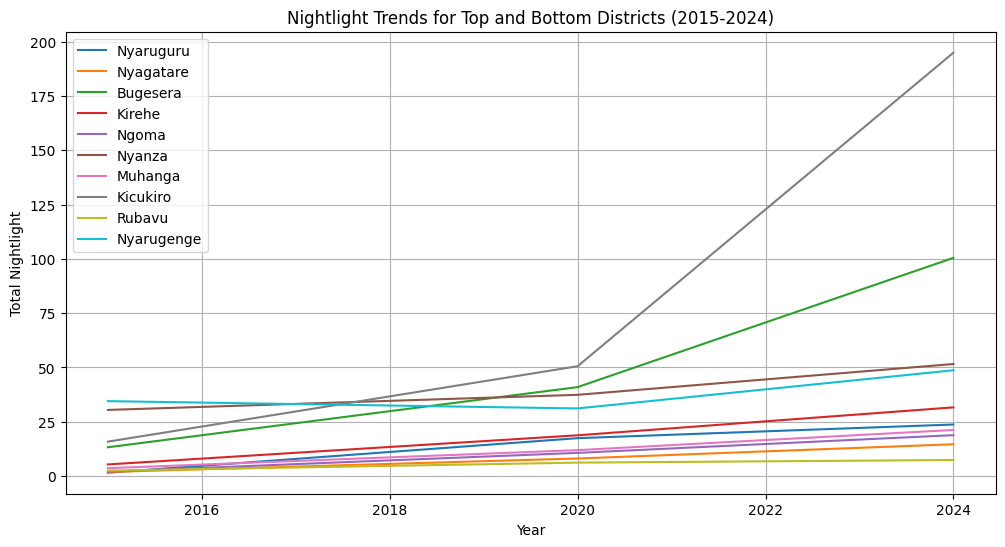

In [ ]:
# Define nightlight columns (adjust years as needed)
nightlight_cols = [col for col in merged_df.columns if col.startswith('total_nightlight_')]
years = [int(col.split('_')[-1]) for col in nightlight_cols]  # Extract years from column names
print("Nightlight columns:", nightlight_cols)
print("Years:", years)


# Combine top and bottom districts
districts = top_5_districts['district_name_x'].tolist() + bottom_5_districts['district_name_x'].tolist()
print("Districts to plot:", districts)

# Visualize nightlight trends
plt.figure(figsize=(12, 6))
for district in districts:
    # Filter data for the district
    district_data = merged_df[merged_df['district_name_x'] == district][nightlight_cols]
    if district_data.empty:
        print(f"Warning: No data for district {district}. Skipping.")
        continue
    # Create a DataFrame with years and nightlight values
    trend_data = pd.DataFrame({
        'year': years,
        'total_nightlight': district_data.iloc[0][nightlight_cols].values
    })
    plt.plot(trend_data['year'], trend_data['total_nightlight'], label=district)

plt.title("Nightlight Trends for Top and Bottom Districts (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total Nightlight")
plt.legend()
plt.grid(True)

In [39]:
# Calculate population density (general_2020 / pixel_count_2024 as a proxy for area)
merged_df['population_density'] = merged_df['general_2020'] / merged_df['pixel_count_2024']

# Define predictors
predictors = ['dependency_ratio', 'people_per_building', 'infrastructure_index',
              'total_nightlight_2024', 'mean_nightlight_2024', 'lit_pixel_percentage_2024']

# Handle missing data
model_data = merged_df[predictors + ['population_density']].dropna()

# Fit the model
X = model_data[predictors]
X = sm.add_constant(X)  # Add intercept
y = model_data['population_density']
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Variable selection: Test combinations (simplified forward selection)
from itertools import combinations
r_squared = []
for i in range(1, len(predictors) + 1):
    for combo in combinations(predictors, i):
        X_combo = sm.add_constant(model_data[list(combo)])
        model_combo = sm.OLS(y, X_combo).fit()
        r_squared.append((combo, model_combo.rsquared_adj))

# Top 3 combinations by adjusted R-squared
top_3_combinations = sorted(r_squared, key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 Predictive Variable Combinations:")
for combo, rsq in top_3_combinations:
    print(f"Variables: {combo}, Adjusted R-squared: {rsq}")

# Model evaluation
print("\nModel Interpretation:")
print(f"R-squared: {model.rsquared:.3f}")
print("Significant predictors (p < 0.05):")
for var, pval in model.pvalues[1:].items():  # Exclude constant
    if pval < 0.05:
        print(f"{var}: Coefficient = {model.params[var]:.3f}, p-value = {pval:.3f}")

                            OLS Regression Results                            
Dep. Variable:     population_density   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     483.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:25:58   Log-Likelihood:                -12387.
No. Observations:                2168   AIC:                         2.479e+04
Df Residuals:                    2161   BIC:                         2.483e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 